<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Optics/JonesVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Polarization and Jones Vectors

This notebook defines Jones vectors for different polarization states of electromagnetic waves and provides functions to create Jones vectors for arbitrary polarization states and decompose Jones vectors into linear and circular polarization components.

Let's define some Jones Vectors

In [5]:
import numpy as np

# Define the Jones vector for a horizontally polarized wave
horizontal_jones_vector = np.array([1, 0], dtype=complex)

# Define the Jones vector for a vertically polarized wave
vertical_jones_vector = np.array([0, 1], dtype=complex)

# Define the Jones vector for a right-circularly polarized wave
right_circular_jones_vector = (1 / np.sqrt(2)) * np.array([1, 1j], dtype=complex)

# Define the Jones vector for a left-circularly polarized wave
left_circular_jones_vector = (1 / np.sqrt(2)) * np.array([1, -1j], dtype=complex)

The following function generates a Jones vector representing an arbitrary polarization state.
The function `create_jones_vector` takes two parameters:
- `angle`: The angle of the polarization ellipse in radians.
- `ellipticity`: The ellipticity of the polarization ellipse.

It returns a numpy array representing the Jones vector, which consists of two complex numbers.

In [6]:
# Define a function to create a Jones vector for an arbitrary polarization state
def create_jones_vector(angle, ellipticity):
  """
  Creates a Jones vector for an arbitrary polarization state.

  Args:
    angle: The angle of the polarization ellipse in radians.
    ellipticity: The ellipticity of the polarization ellipse.

  Returns:
    A numpy array representing the Jones vector.
  """
  cos_angle = np.cos(angle)
  sin_angle = np.sin(angle)
  cosh_ellipticity = np.cosh(ellipticity)
  sinh_ellipticity = np.sinh(ellipticity)
  return np.array([
      cos_angle * cosh_ellipticity + sin_angle * sinh_ellipticity * 1j,
      -sin_angle * cosh_ellipticity + cos_angle * sinh_ellipticity * 1j
  ], dtype=complex)



Now we define a function that will decompose a Jones vector into its linear and circular component

In [7]:

# Define a function to decompose a Jones vector into linear and circular polarization
def decompose_jones_vector(jones_vector):
  """
  Decomposes a Jones vector into linear and circular polarization.

  Args:
    jones_vector: A numpy array representing the Jones vector.

  Returns:
    A tuple containing the following:
      - The Jones vector for the linear polarization component.
      - The Jones vector for the circular polarization component.
  """
  linear_component = (1 / 2) * (jones_vector[0] + jones_vector[1])
  circular_component = (1 / 2) * (jones_vector[0] - jones_vector[1]) * 1j
  return linear_component, circular_component


Let's test our function

In [8]:
# Example usage:
# Create a Jones vector for a horizontally polarized wave
jones_vector = create_jones_vector(0, 0)

# Decompose the Jones vector into linear and circular polarization
linear_component, circular_component = decompose_jones_vector(jones_vector)

# Print the results
print("Horizontal polarization Jones vector:")
print(jones_vector)
print("Linear polarization component:")
print(linear_component)
print("Circular polarization component:")
print(circular_component)


Horizontal polarization Jones vector:
[1.+0.j 0.+0.j]
Linear polarization component:
(0.5+0j)
Circular polarization component:
0.5j


## Plotting

The code  below consists of two functions:

1. `generate_waveforms()`: This function generates a sinusoidal waveform with complex exponential factor.
2. `electricField(jones_vector)`: This function generates the (complex) electric field with respect to a given Jones vector.

In [50]:
# Function to generate the (complex) electric field with respect to a given Jones vector
def electricField(jones_vector):
    # Generate waveform using the provided function
    waveform = generate_waveforms()
    # Multiply each component of the Jones vector by the waveform to obtain electric field
    return jones_vector[0] * waveform, jones_vector[1] * waveform

# Function to generate the waveform
def generate_waveforms():
    # Generate a time array from 0 to 2*pi with 100 samples
    t = np.linspace(0, 2*np.pi, 100)
    # Create a sinusoidal waveform with complex exponential decay
    sinusoidalTime = np.exp(-1j * t)
    # Return the generated waveform
    return sinusoidalTime

The code below generates a subplot with three plots representing different polarizations using Jones vectors. The plots illustrate the electric field components $E_x$ and $E_y$ for each polarization.


- It creates a subplot with one row and three columns, sharing the same x and y axes across all subplots.
- Three different Jones vectors representing right circular, vertical, and elliptical polarizations are assigned.
- The electric field components (`Ex` and `Ey`) are computed using a function called `electricField` for each Jones vector.
- The `Ex` and `Ey` components are then plotted on their respective subplots.


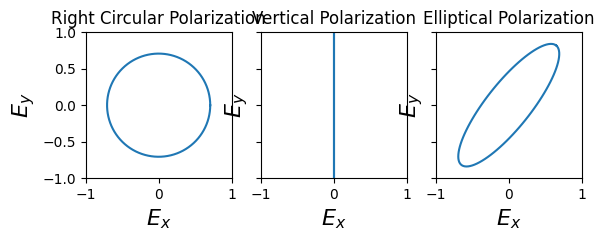

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
fig, axs = plt.subplots(1,3, sharex=True, sharey=True)

for ax in axs:
  ax.set_xlabel(r'$E_x$', fontsize=16)
  ax.set_ylabel(r'$E_y$', fontsize=16)
  ax.set_ylim(-1,1)
  ax.set_xlim(-1,1)
  ax.set_aspect(1)

jones_vector = right_circular_jones_vector
Ex, Ey = np.real(electricField(jones_vector))
axs[0].plot(Ex,Ey)
axs[0].set_title("Right Circular Polarization")

jones_vector = vertical_jones_vector
Ex, Ey = np.real(electricField(jones_vector))
axs[1].plot(Ex,Ey)
axs[1].set_title("Vertical Polarization")

jones_vector = create_jones_vector(-0.4, -0.5j+0.3)
Ex, Ey = np.real(electricField(jones_vector))
axs[2].plot(Ex,Ey)
axs[2].set_title("Elliptical Polarization")

plt.show()